In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

from data.utils import get_week_range_df, to_week_range
from models.ar_model import ARModelSpecification, create_ar_models_report, create_all_ar_models_report
from models.persistence_model import create_persistence

# Global set-up
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['axes.grid'] = True
sns.set_style("whitegrid")

# Global set-up
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['axes.grid'] = True
sns.set_style("whitegrid")

## Global Variables

In [13]:
GROUND_TRUTH_COLUMN = 'Disease Rate'
BASELINE_SHIFT = 1
PERSISTENCE_COL_NAME = 'Persistence'
LAGS = 20

In [14]:
DF = get_week_range_df('week range')
DF = create_persistence(DF, BASELINE_SHIFT, persistance_col_name=PERSISTENCE_COL_NAME)

In [15]:
MODEL_SPECS = [ARModelSpecification(order=(3, 0, 1), model_class=SARIMAX),
               ARModelSpecification((3, 0, 0), seasonal_order=(3, 0, 0, 52), model_class=SARIMAX)
               ]

## Training: 2004-2008
## Testing: 2009

In [16]:
train_interval = (to_week_range(2004, 2), to_week_range(2009, 1))
test_interval = (to_week_range(2009, 1), to_week_range(2009, 52))

In [17]:
ar_model_report = create_ar_models_report(data=DF, ar_model_specs=MODEL_SPECS, train_interval=train_interval,
                                          test_interval=test_interval, additional_model_cols=[PERSISTENCE_COL_NAME],
                                          cov_type=None, train_maxiter=3000, optimize_method='powell')
ar_model_report.test_df

Training model statsmodels.tsa.statespace.sarimax.SARIMAX (3, 0, 1)(0, 0, 0, 0) ...

Optimization terminated successfully.
         Current function value: 2.368341
         Iterations: 1
         Function evaluations: 60
Testing model statsmodels.tsa.statespace.sarimax.SARIMAX (3, 0, 1)(0, 0, 0, 0) ...

Training model statsmodels.tsa.statespace.sarimax.SARIMAX (3, 0, 0)(3, 0, 0, 52) ...



E:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Optimization terminated successfully.
         Current function value: 2.319560
         Iterations: 3
         Function evaluations: 237
Testing model statsmodels.tsa.statespace.sarimax.SARIMAX (3, 0, 0)(3, 0, 0, 52) ...

Creating error tables ...



In [18]:
ar_model_report.trainResultsMap[MODEL_SPECS[0]].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Disease Rate   No. Observations:                  261
Model:               SARIMAX(3, 0, 1)   Log Likelihood                -618.137
Date:                Mon, 14 Mar 2022   AIC                           1246.274
Time:                        18:07:30   BIC                           1264.096
Sample:                    01-11-2004   HQIC                          1253.438
                         - 01-04-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7068      0.924      0.765      0.444      -1.103       2.517
ar.L2          0.3578      0.960      0.373      0.709      -1.523       2.239
ar.L3         -0.0961      0.067     -1.438      0.150      -0.227       0.035
ma.L1          0.3219      0.917      0.351      0.725      -1.475       2.118
sigma2         6.5969      0.211     31.275      0.000       6.183       7.010
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              2358.44
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               3.06   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
ar_model_report.show_errors()

,years,no. of weeks,"0 (3, 0, 1)(0, 0, 0, 0)","1 (3, 0, 0)(3, 0, 0, 52)",Persistence
0,2009,52,6.861932,6.983160,7.360456


,years,no. of weeks,"0 (3, 0, 1)(0, 0, 0, 0)","1 (3, 0, 0)(3, 0, 0, 52)",Persistence
0,2009,52,26.268911,27.958495,29.901681


,years,no. of weeks,"0 (3, 0, 1)(0, 0, 0, 0)","1 (3, 0, 0)(3, 0, 0, 52)",Persistence
0,2009,52,349.847932,353.995330,349.426647


,years,no. of weeks,"0 (3, 0, 1)(0, 0, 0, 0)","1 (3, 0, 0)(3, 0, 0, 52)",Persistence
0,2009,52,18.704222,18.814764,18.692957


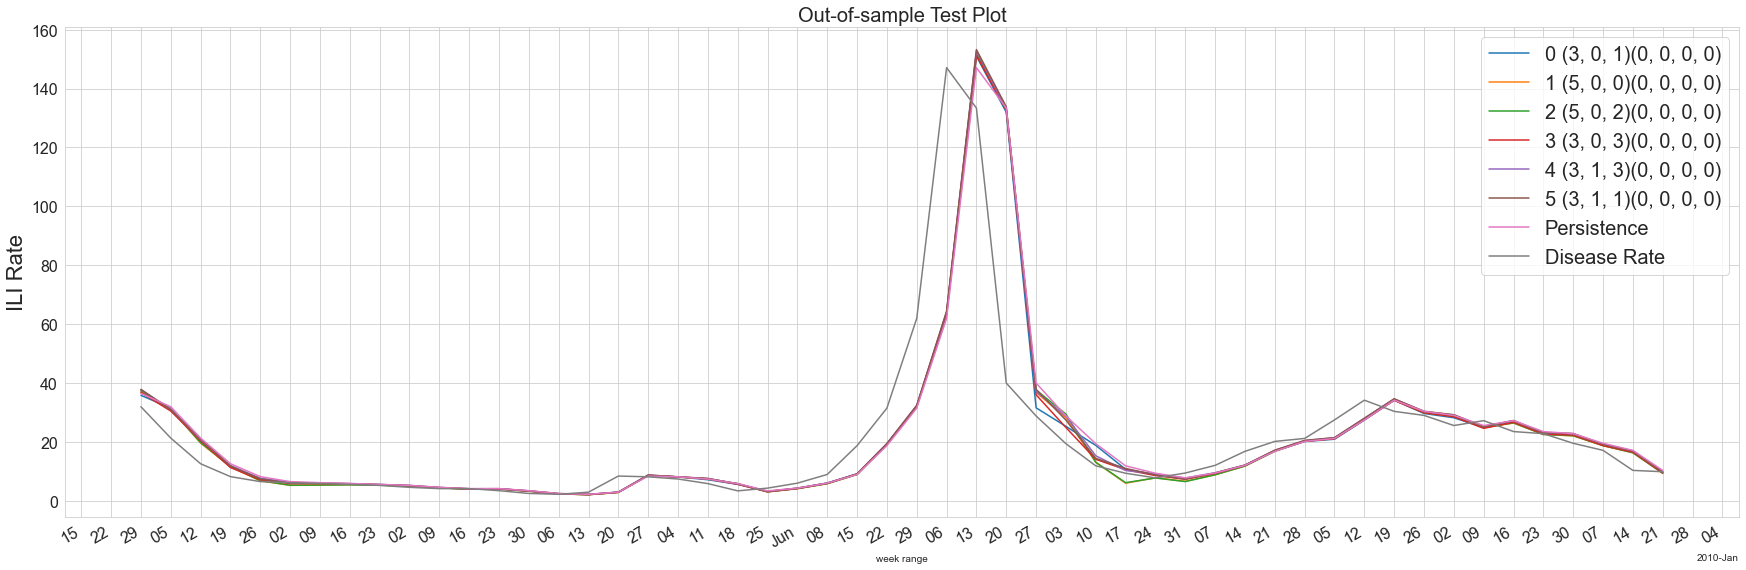

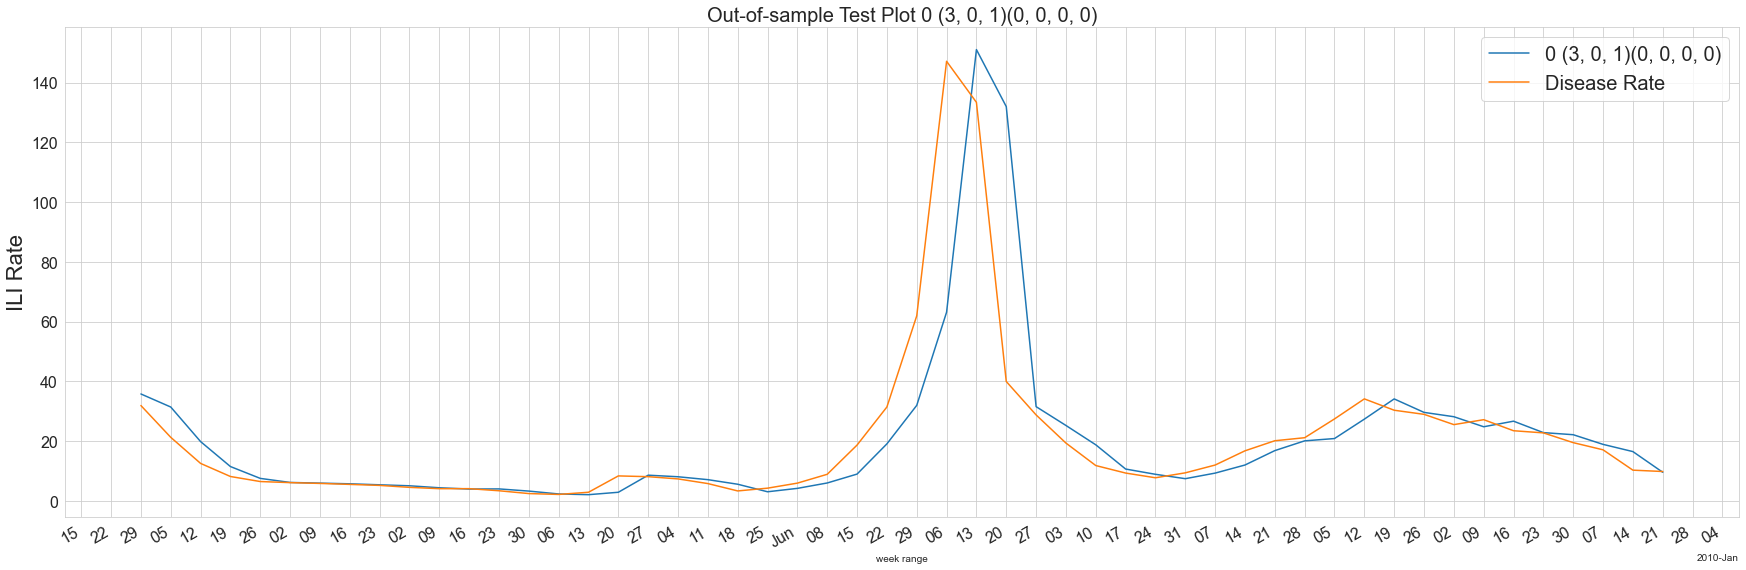

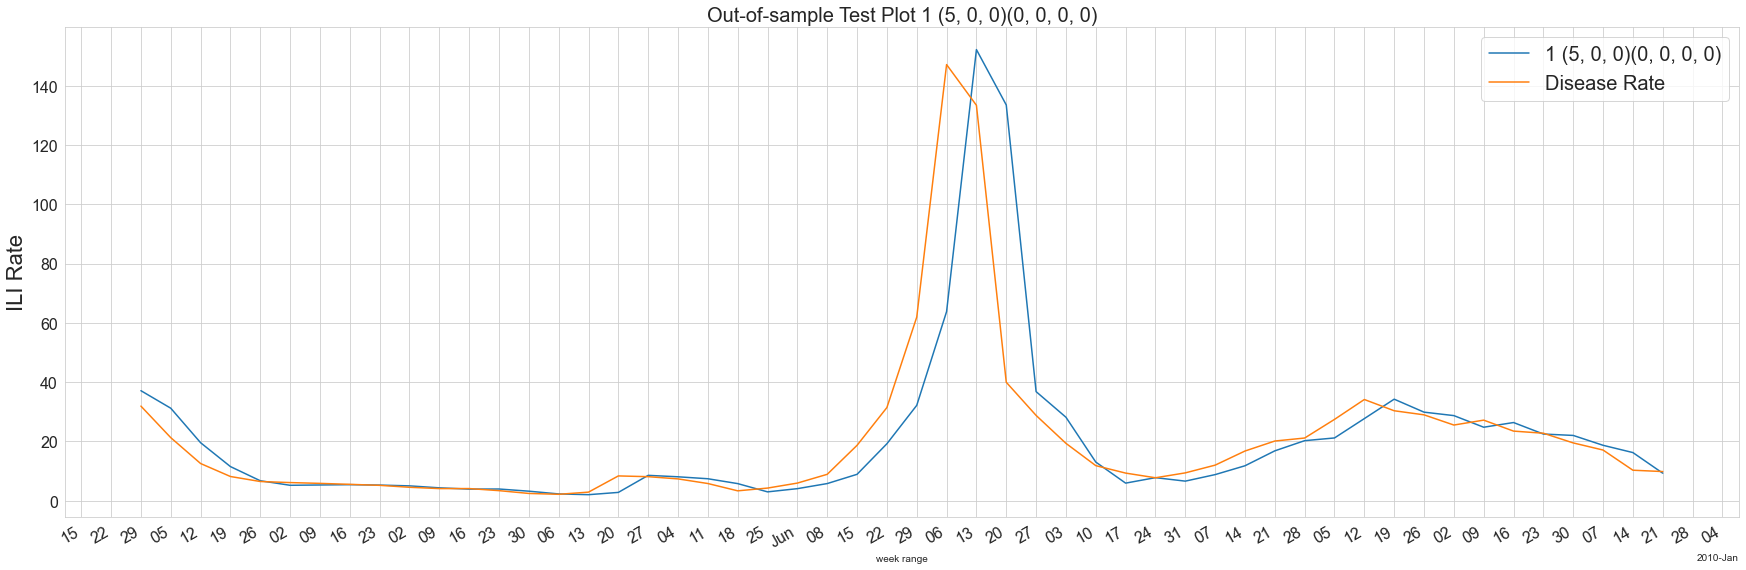

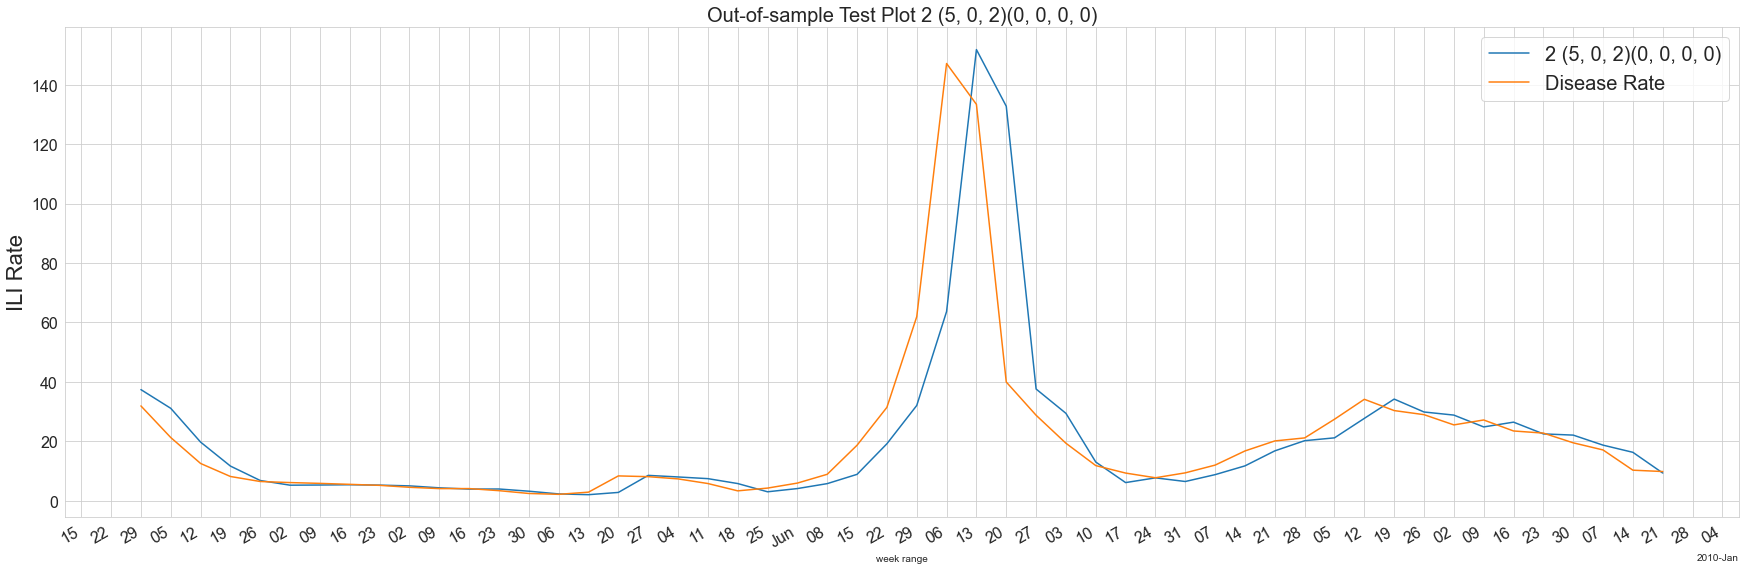

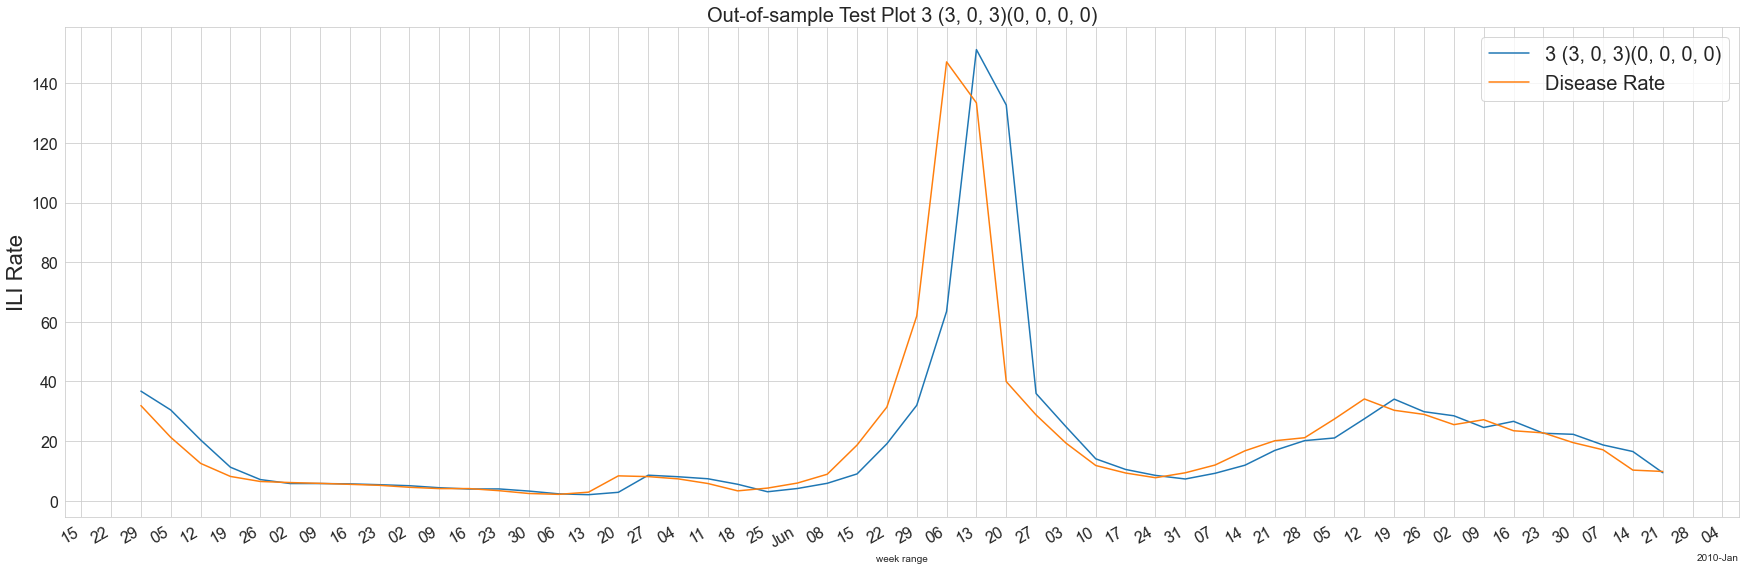

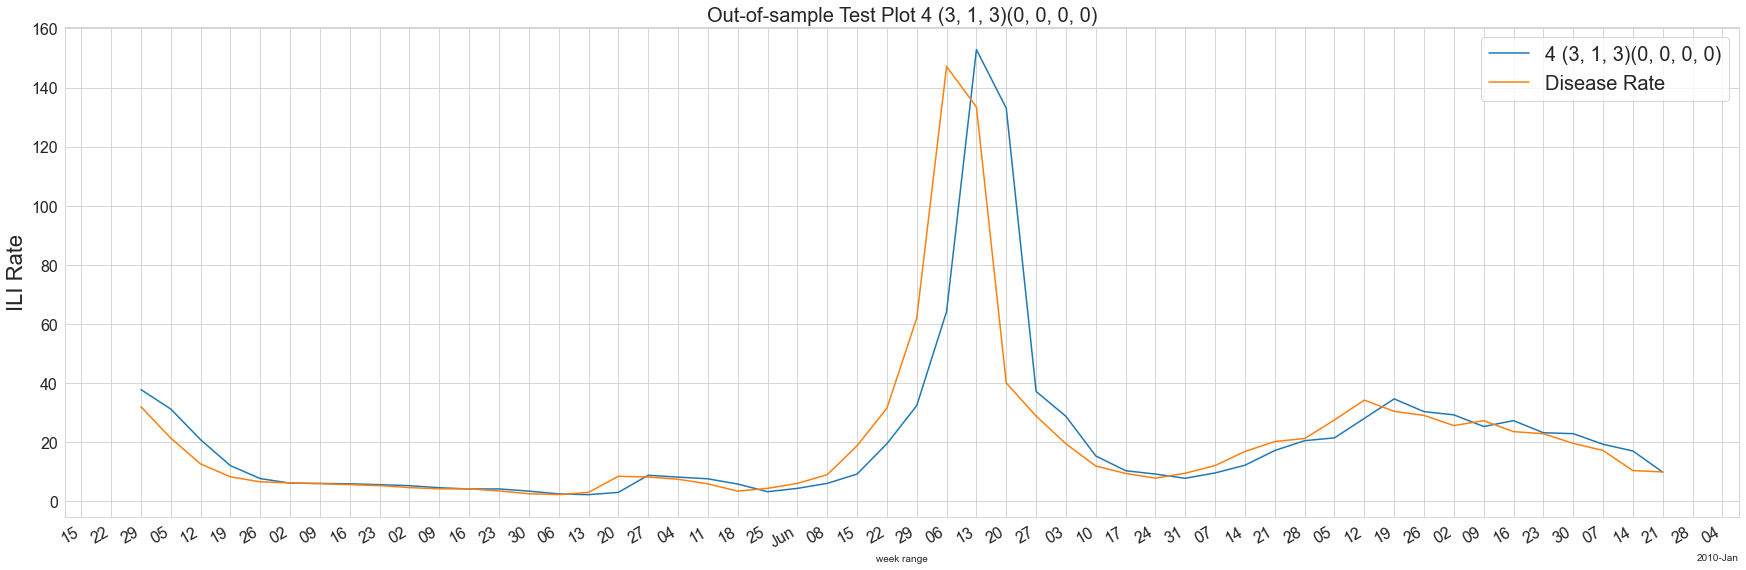

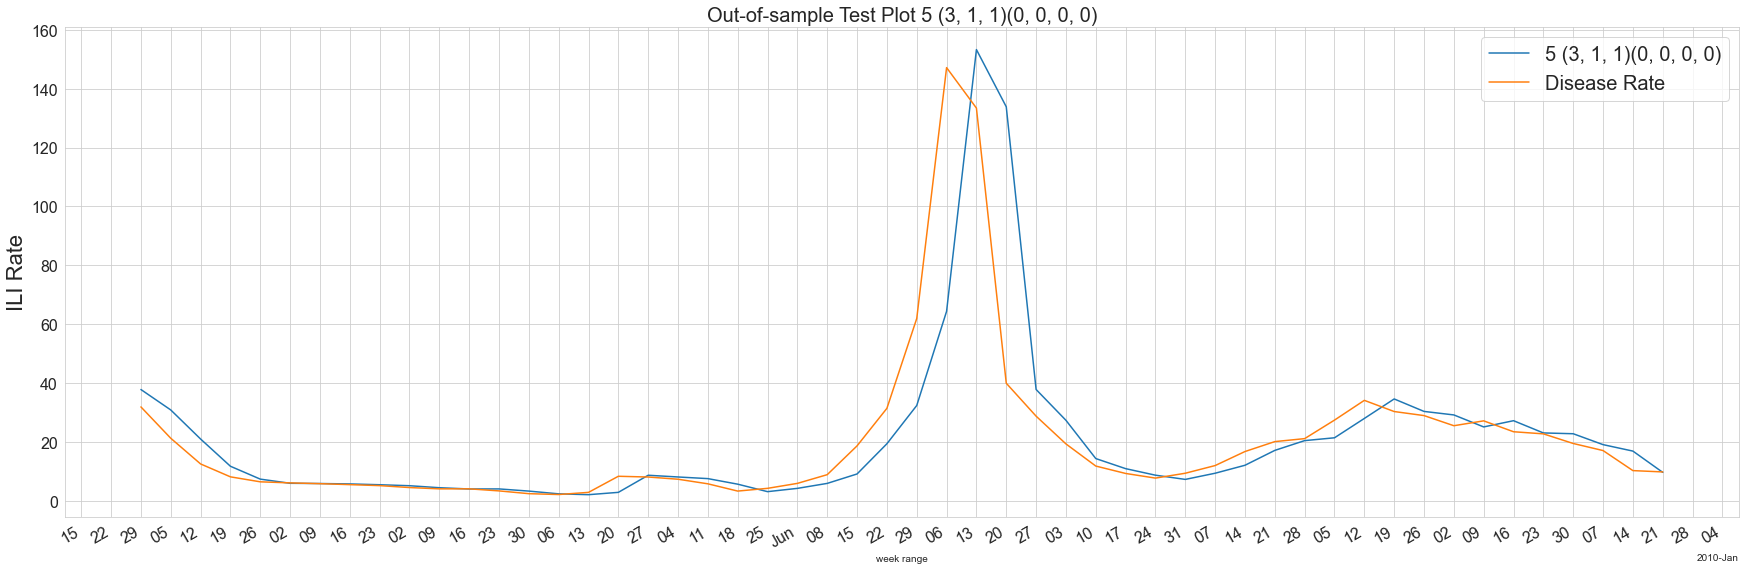

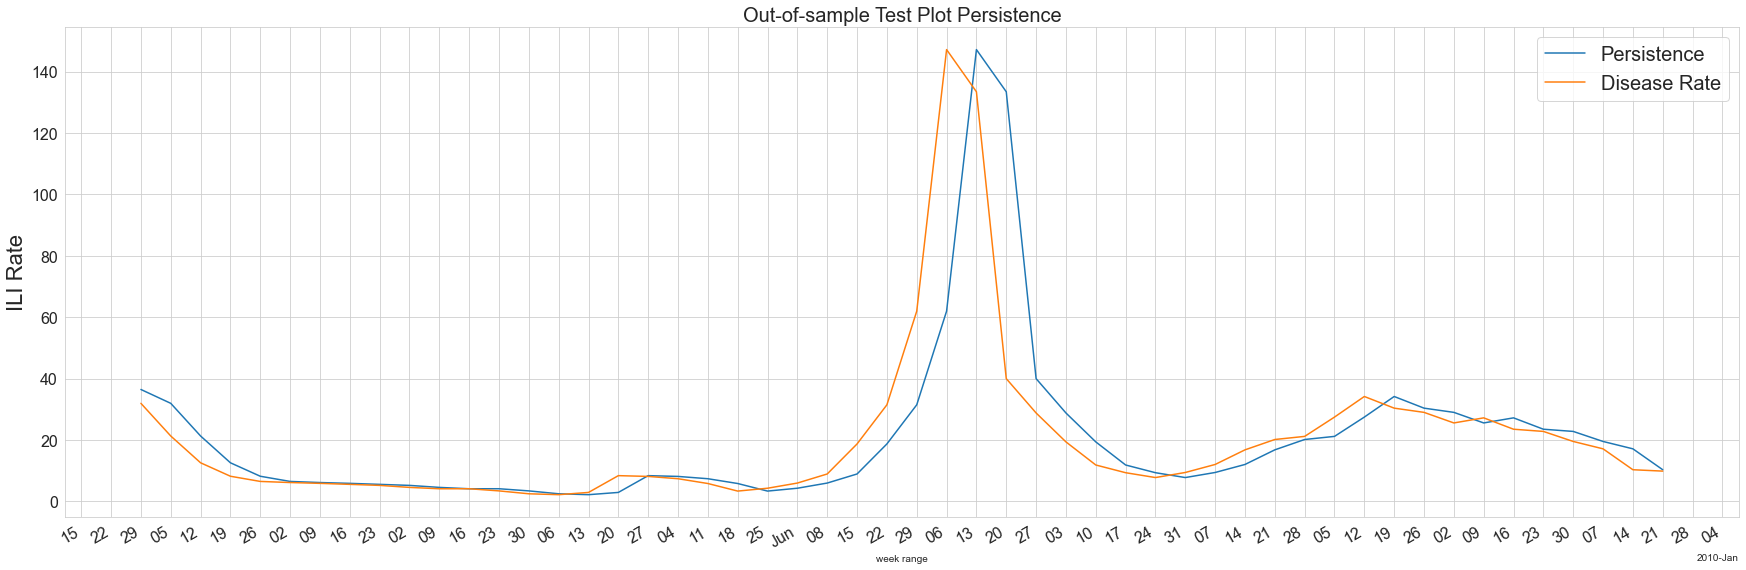

In [8]:
ar_model_report.plot_models(include_ground_truth=True, multi_plot=True)

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(DF[GROUND_TRUTH_COLUMN], autolag='AIC', maxlag=30)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('used lags: %i' % result[2])

ADF Statistic: -7.851489
p-value: 0.000000
used lags: 4


TypeError: float() argument must be a string or a number, not 'Period'

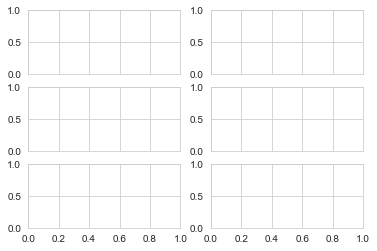

In [10]:

from statsmodels.graphics.tsaplots import plot_acf

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(DF[GROUND_TRUTH_COLUMN]);
axes[0, 0].set_title('Original Series')
plot_acf(DF[GROUND_TRUTH_COLUMN], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(DF[GROUND_TRUTH_COLUMN].diff());
axes[1, 0].set_title('1st Order Differencing')
plot_acf(DF[GROUND_TRUTH_COLUMN].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(DF[GROUND_TRUTH_COLUMN].diff().diff());
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(DF[GROUND_TRUTH_COLUMN].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [10]:
TRAIN_INTERVALS = [(to_week_range(2004, 2), to_week_range(2008, 52)),
                   (to_week_range(2005, 1), to_week_range(2009, 52)),
                   (to_week_range(2006, 2), to_week_range(2010, 52)),
                   (to_week_range(2007, 2), to_week_range(2011, 52)),
                   (to_week_range(2008, 2), to_week_range(2012, 52)),
                   (to_week_range(2009, 2), to_week_range(2013, 52)),
                   (to_week_range(2010, 2), to_week_range(2014, 52)),
                   (to_week_range(2011, 2), to_week_range(2015, 52)),
                   (to_week_range(2012, 2), to_week_range(2016, 52)),
                   (to_week_range(2013, 2), to_week_range(2017, 52)),
                   ]
print('# training windows = %d' % len(TRAIN_INTERVALS))

TEST_INTERVALS = [(to_week_range(2009, 1), to_week_range(2009, 52)),
                  (to_week_range(2010, 1), to_week_range(2010, 52)),
                  (to_week_range(2011, 2), to_week_range(2011, 52)),
                  (to_week_range(2012, 2), to_week_range(2012, 52)),
                  (to_week_range(2013, 2), to_week_range(2013, 52)),
                  (to_week_range(2014, 2), to_week_range(2014, 52)),
                  (to_week_range(2015, 2), to_week_range(2015, 52)),
                  (to_week_range(2016, 2), to_week_range(2016, 52)),
                  (to_week_range(2017, 2), to_week_range(2017, 52)),
                  (to_week_range(2018, 2), to_week_range(2018, 52)),
                  ]
print('# testing windows = %d' % len(TEST_INTERVALS))

# training windows = 10
# testing windows = 10


In [11]:
ar_model_report = create_all_ar_models_report(data=DF, ar_model_specs=MODEL_SPECS, train_intervals=TRAIN_INTERVALS,
                                              test_intervals=TEST_INTERVALS,
                                              additional_model_cols=[PERSISTENCE_COL_NAME],
                                              cov_type=None, train_maxiter=3000, optimize_method='powell')

Exception: all test interval must span single, disjoint years form each other (current implementation).